# Update filename and headers

### Dawson Pallotta

In [29]:
#imports all of the neccessary packages into the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [16]:
#grabs and reads the dataset that will be used
df = pd.read_csv("C:/Users/student/Downloads/featureSet2weeksDepreST-CAT.csv")
print(df.shape)
df.head()

(369, 571)


,id,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,...,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate,phq9,gad7
0,00WRNS3MK,9.0,0.015,9.0,0.000000,2.0,11.0,0.0,0.0,0.071429,...,459.477150,470.749139,418.339485,359.621089,313.628753,279.227008,252.763489,6.0,19,17
1,053F3JF85,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.071429,...,71313.172411,36465.583963,17095.999871,9816.542806,7844.960672,7736.559582,8121.111828,4.0,21,18
2,06YZBXW0E,3502.0,1.885,3502.0,0.052364,2.0,11.0,4.0,19.0,0.071429,...,204709.752186,186733.562302,156745.895593,133391.876158,117398.100146,106005.951572,97271.892871,4.0,4,2
3,0832IIHPX,12330.0,3.380,12330.0,0.057781,2.0,11.0,4.0,35.0,0.071429,...,41170.830053,29359.972379,20128.281500,15130.132857,12683.304503,11425.601575,10674.777554,8.0,7,6
4,0AS1KO35P,860.0,0.845,860.0,0.055721,2.0,11.0,1.0,8.0,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4,0


In [30]:
#this splits the data between the data for depression and the data for anxiety
split = 10
data = df[:]
d10 = []
g10 = []
for i in range(0, data.shape[0]):
    if int(data.phq9[i]) >= split:
        d10.append(1)
    else:
        d10.append(0)
    if int(data.gad7[i]) >= split:
        g10.append(1)
    else:
        g10.append(0)
data["phq9"] = d10
data["gad7"] = g10

#checking values
print(sum(d10)/len(d10))
print(len(d10))
print(sum(g10)/len(g10))
print(len(g10))

0.0
369
0.0
369


With a split of 20, 16.5% of participants screened positive for depression and 5.4% of participants screened positive for anxiety.

Change the split (possible values are between 1 and 20). Based on your new split: 10
* what percent of participants screened positive for anxiety and depression? 
##### 56.6% screened positve for depression and 43.6% screened postive for anxiety
* which of the class labels (depression vs anxiety) is more well balanced?
##### The class label of positivity of depression is more well balanced as it has a value of .56 meaning it is closer to 50% compared to the anxiety with a value of .43
* which evaluation metric would you want to use based on both classes?
##### The evaluation metric you would want to use should be balance accuracy because it measure if the values that are in the dataset are true positives in the data set
* what evaluation metric is used in the below code? Does it match your chosen evaluation metric?
##### The evealuation metric being used below is balanced accuracy, and it does match my chosen metric 

## Machine learning code with comments added for you

In [20]:
#reading about python def https://www.w3schools.com/python/ref_keyword_def.asp
#sets the metrics that are to be tested

def get_ba(x,y,z,q):
    #fit model and make predictions
    clf.fit(x, list(y))
    y_pred = clf.predict(z)

    #evaluate model - testing
    conf_mat = confusion_matrix(list(q), y_pred)
    TN = conf_mat[0][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    sens = TP/(TP+FN)
    spec = TN/(TN+FP)
    ba = (sens + spec)/2
    return ba

In [23]:
#sets the features and sets up the training code
%%time
numberOfFeatures = 2 #set number of principal components
modelTypelist = ["dt", "dt1", "dt2", "dt4", "dt8","dt16"]

train_ba_depression = []
train_ba_anxiety = []
test_ba_depression = []
test_ba_anxiety = []
rlist = []
mlist = []

for modelType in modelTypelist: 
    for r in range(50, 75):
        rlist.append(r)
        mlist.append(modelType)

        #create train/test sets
        df_train, df_test = train_test_split(data, test_size=0.3, stratify=data[["phq9", "gad7"]], random_state = r)

        #save target variables
        train_targets = df_train.loc[:,["phq9","gad7"]]
        test_targets = df_test.loc[:,["phq9","gad7"]]

        #drop non-features: id and targets
        trainContent = df_train.drop(columns = ["id", "phq9", "gad7"])
        testContent = df_test.drop(columns = ["id", "phq9", "gad7"])

        #normalize before pca
        min_max_scaler = preprocessing.MinMaxScaler()  
        np_scaled = min_max_scaler.fit_transform(trainContent)
        featureSubset = pd.DataFrame(np_scaled)
        np_scaled2 =  min_max_scaler.transform(testContent)
        testSubset = pd.DataFrame(np_scaled2)

        #principal component analysis
        pca = PCA(n_components=numberOfFeatures)
        pca = pca.fit(featureSubset)
        X_pca = pca.transform(featureSubset)
        pcaDF = pd.DataFrame(X_pca)
        testSubset2 = pca.transform(testSubset)
        pca_test = pd.DataFrame(testSubset2)

        #upsampling to balance classes
        train_targets = train_targets.reset_index(drop = True)
        pcaDF_labels = pd.concat([pcaDF,train_targets], axis = 1) #reattach labels

        phq0 = pcaDF_labels[pcaDF_labels.phq9 == 0]
        phq1 = pcaDF_labels[pcaDF_labels.phq9 == 1]
        if phq0.shape[0]>phq1.shape[0]:
            phq_upsampled = resample(phq1, n_samples=(phq0.shape[0]-phq1.shape[0]), random_state=50)
            pca_phq_up = pd.concat([pcaDF_labels, phq_upsampled])
        elif phq0.shape[0]<phq1.shape[0]:
            phq_upsampled = resample(phq0, n_samples=(phq1.shape[0]-phq0.shape[0]), random_state=50)
            pca_phq_up = pd.concat([pcaDF_labels, phq_upsampled])

        gad0 = pcaDF_labels[pcaDF_labels.gad7 == 0]
        gad1 = pcaDF_labels[pcaDF_labels.gad7 == 1]

        if gad0.shape[0]>gad1.shape[0]:
            gad_upsampled = resample(gad1, n_samples=(gad0.shape[0]-gad1.shape[0]), random_state=50)
            pca_gad_up = pd.concat([pcaDF_labels, gad_upsampled])
        elif gad0.shape[0]<gad1.shape[0]:
            gad_upsampled = resample(gad0, n_samples=(gad1.shape[0]-gad0.shape[0]), random_state=50)
            pca_gad_up = pd.concat([pcaDF_labels, gad_upsampled])

        #remove upsampled labels
        pca_phq_targets = pca_phq_up.loc[:,["phq9","gad7"]]
        pca_phq_features = pca_phq_up.drop(columns = ["phq9", "gad7"])

        pca_gad_targets = pca_gad_up.loc[:,["phq9","gad7"]]
        pca_gad_features = pca_gad_up.drop(columns = ["phq9", "gad7"])

        #select modeltype
        if modelType == "dt":
            clf = tree.DecisionTreeClassifier(random_state = r)
        elif modelType == "dt1":
            clf = tree.DecisionTreeClassifier(random_state = r, max_depth=1)
        elif modelType == "dt2":
            clf = tree.DecisionTreeClassifier(random_state = r, max_depth=2)
        elif modelType == "dt4":
            clf = tree.DecisionTreeClassifier(random_state = r, max_depth=4)
        elif modelType == "dt8":
            clf = tree.DecisionTreeClassifier(random_state = r, max_depth=8)
        elif modelType == "dt16":
            clf = tree.DecisionTreeClassifier(random_state = r, max_depth=16)
            
        
        #train evaluate models
        for label in ["phq9","gad7"]:
            if label == "phq9":
                ba = get_ba(pca_phq_features, pca_phq_targets[label], pca_test, test_targets[label])
                test_ba_depression.append(ba)
                
                ba = get_ba(pca_phq_features, pca_phq_targets[label], pcaDF, train_targets[label])
                train_ba_depression.append(ba)
                
            if label == "gad7":
                ba = get_ba(pca_gad_features, pca_gad_targets[label], pca_test, test_targets[label])
                test_ba_anxiety.append(ba)
                
                ba = get_ba(pca_gad_features, pca_gad_targets[label], pcaDF, train_targets[label])
                train_ba_anxiety.append(ba)
                     
resultsDF = pd.DataFrame()
resultsDF["train_ba_deppression"] = train_ba_depression
resultsDF["train_ba_anxiety"] = train_ba_anxiety
resultsDF["test_ba_deppression"] = test_ba_depression
resultsDF["test_ba_anxiety"] = test_ba_anxiety
resultsDF["random"] = rlist
resultsDF["model"] = mlist
resultsDF.head(10)

Wall time: 29.3 s


,train_ba_deppression,train_ba_anxiety,test_ba_deppression,test_ba_anxiety,random,model
0,0.969178,0.973451,0.533234,0.483631,50,dt
1,0.962329,0.969027,0.643353,0.572917,51,dt
2,0.976027,0.982301,0.525794,0.512401,52,dt
3,0.969178,0.969027,0.501984,0.473710,53,dt
4,0.962329,0.964602,0.553571,0.517857,54,dt
5,0.972603,0.973451,0.496032,0.469742,55,dt
6,0.982877,0.982301,0.504464,0.531250,56,dt
7,0.962329,0.964602,0.564980,0.619544,57,dt
8,0.969178,0.973451,0.469246,0.546627,58,dt
9,0.962329,0.969027,0.559524,0.480655,59,dt


What is the order of steps in the above machine learning code? What was the order of steps in the prior machine learning code?
###### a. set number of principal components, b. create train/test sets, c. save target variables, d. drop non-features: id and targets, e. normalize before pca, f. prinicpal component analysis, g. upsampling to balance classes, h. reattach labels, i. remove unsampled labels, j. select model type, k. tarin evaluation model. 
###### a. 

Since test_size=0.3, how many participants (data instances) are in the training set and the test set?
###### There are 258 participants in the training set and 111 participants in the test set.

After resampling the train set to balance classes, how many instances are used to train the model for depression and for anxiety? Please show your work. Hint, you will need the number of participants in the training set and the percent of participants who screened positive based on the chosen split.

Depression: 56.6% screened for depression, 43.4% didn't
258 * 56.6% = 146 people who screened for depression
258 * 43.4% = 112 people who screened for no depression
146 - 112 = 34 particpants that were added who don't have depression
146 + 112 + 34 = 292 particpants upsampled for the new training set


Anxiety: 43.4% screened for anxiety, 56.6% didn't
258 * 43.4% = 112 people who screened for anxiety
258 * 56.6% = 146 people who screened for no anxiety
146 - 112 = 34 particpants that were added who don't have anxiety
146 + 112 + 34 = 292 particpants upsampled for the new training set

What parameter is different between the different decision tree models?
The only different parameter between the different decision tree models is max depth.

## Plotting

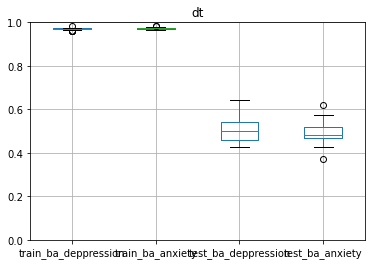

0.48157272791122363
0.49117063492063484


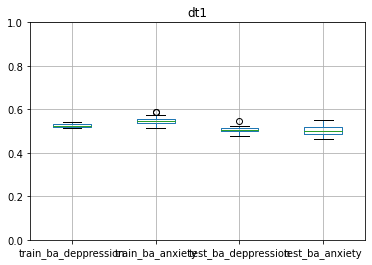

0.04610820848530628
0.5024007936507937


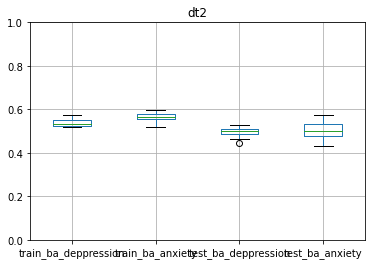

0.06154561615104803
0.5030158730158729


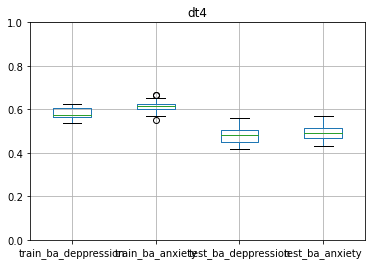

0.121441390451003
0.49456349206349204


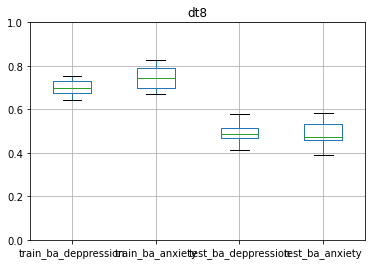

0.25774841245622426
0.48845238095238097


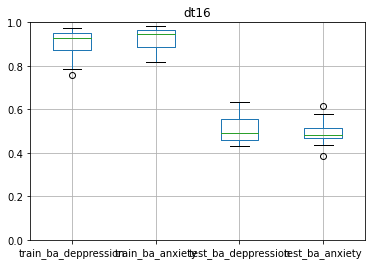

0.43306177858184297
0.49355158730158727


In [28]:
#plots the training and testing information for the data of depression and anxiety
for modelType in modelTypelist: 
    tempDF = resultsDF[resultsDF.model == modelType]
    tempDF.boxplot(['train_ba_deppression', 'train_ba_anxiety', 'test_ba_deppression','test_ba_anxiety'])
    plt.title(modelType)
    plt.ylim(0, 1)
    plt.show()
    plt.close()
    tr = np.mean(tempDF["train_ba_anxiety"])
    te = np.mean(tempDF["test_ba_anxiety"])
    print(tr-te)
    print(te)

For the model with the default parameters, what is the:
* difference between the average training and testing balanced accuracy for depression screening? (calculated for you)
46.2%
* difference between the average training and testing balanced accuracy for anxiety screening? (please modify code accordingly to calculate)
48.2%

Based on the results on the training data, do any models:
* underfit? if so, which ones? 
The plots that are underfit are dt1 and dt2
* overfit? if so, which ones?
The plots that are overfit are dt and dt16

What is the highest average balanced accuracy using the test set for depression and test set for anxiety? Which model(s) and split is this with?
The highest balance accuracy is dt16 with .5085 for depression and for anxiety is dt2 with .504. 
What can you conclude about overfitting and model parameters?
Overfitting tends to change on whether it is or isn't overfitting based on he exact parameter that is being used and the training and testing information that is being utilized.